In [ ]:
from fastai.vision import *
from fastai.callbacks import *
import warnings
warnings.filterwarnings('ignore')


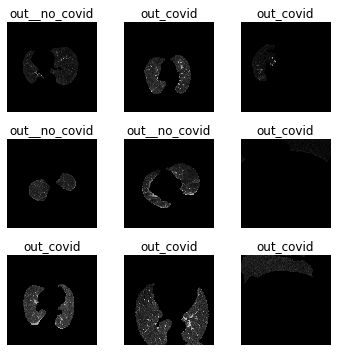

In [ ]:
tfms = get_transforms()
data = ImageDataBunch.from_folder('../segmented_data/', bs=32, size=224, ds_tfms=get_transforms())
data.normalize(imagenet_stats)
img,label = data.train_ds[0]
data.show_batch(rows=3, figsize=(5,5))

In [ ]:

learn = cnn_learner(data, models.densenet169, metrics=accuracy, callback_fns=[
                 ShowGraph])        
callbacks = [
    EarlyStoppingCallback(learn, min_delta=1e-5, patience=7),
    SaveModelCallback( learn )
]

learn.callbacks = callbacks

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion= True)

Exception in thread Thread-53:
Traceback (most recent call last):
  File "/home/mlemsalu/miniconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/home/mlemsalu/miniconda3/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mlemsalu/miniconda3/lib/python3.7/site-packages/torch/utils/data/_utils/pin_memory.py", line 25, in _pin_memory_loop
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/home/mlemsalu/miniconda3/lib/python3.7/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "/home/mlemsalu/miniconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 294, in rebuild_storage_fd
    fd = df.detach()
  File "/home/mlemsalu/miniconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/mlemsalu/miniconda3/lib/python3.7/multiprocessing/re

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Best loss at batch #False/13, may consider .plot(skip_end=16)


KeyboardInterrupt: 

epoch,train_loss,valid_loss,accuracy,time
0,1.051772,0.720638,0.617188,00:09
1,0.870338,0.635906,0.656250,00:09
2,0.804052,0.817491,0.687500,00:10
3,0.742302,0.978074,0.609375,00:09
4,0.639295,0.947573,0.703125,00:09
5,0.564215,0.972525,0.703125,00:09
6,0.489198,1.070525,0.562500,00:09
7,0.441850,1.668003,0.679688,00:09
8,0.375875,1.339480,0.703125,00:09


Better model found at epoch 0 with valid_loss value: 0.7206376791000366.


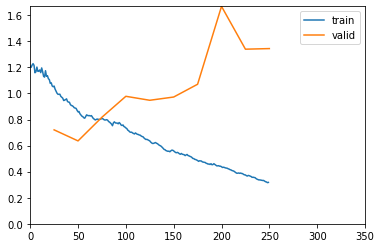

Better model found at epoch 1 with valid_loss value: 0.6359058022499084.
Epoch 9: early stopping


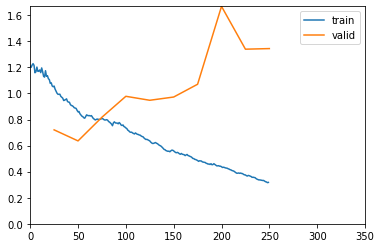

In [ ]:
learn.fit_one_cycle(14, 1.1E-03)

In [ ]:
preds,y, loss = learn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.7594936490058899 %.


In [ ]:
learn.save('stage-2')

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.51E-05
Min loss divided by 10: 1.00E-04


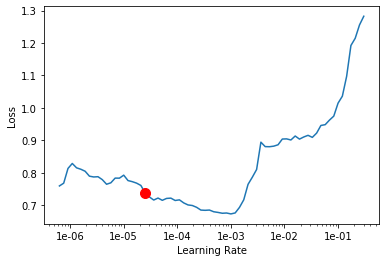

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion= True)

epoch,train_loss,valid_loss,accuracy,time
0,0.755761,0.663557,0.695312,00:11
1,0.738625,0.917067,0.640625,00:11
2,0.697421,1.035124,0.640625,00:11
3,0.708102,1.101810,0.632812,00:11
4,0.668017,1.138780,0.617188,00:11
5,0.630649,1.205160,0.601562,00:11
6,0.606957,1.272527,0.593750,00:11
7,0.611355,1.347100,0.585938,00:11


Better model found at epoch 0 with valid_loss value: 0.6635565757751465.


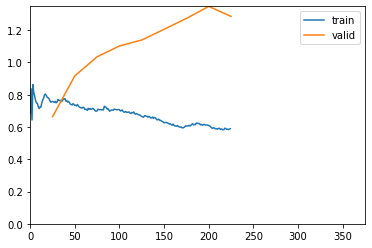

Epoch 8: early stopping


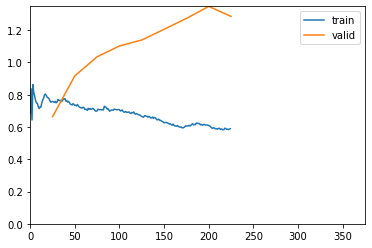

In [ ]:
learn.fit_one_cycle(15, max_lr=slice(1e-7,1e-5))



epoch,train_loss,valid_loss,accuracy,time
0,0.647268,1.346131,0.575949,00:09
1,0.669998,1.301844,0.601266,00:09
2,0.679196,3.287108,0.474684,00:09
3,0.602674,0.831938,0.696203,00:09
4,0.527212,3.028516,0.506329,00:09
5,0.471280,1.383525,0.683544,00:09
6,0.425371,1.131739,0.721519,00:09
7,0.357039,1.543995,0.696203,00:09
8,0.309592,1.652199,0.664557,00:09
9,0.286713,1.586950,0.696203,00:09


Better model found at epoch 0 with valid_loss value: 1.3461307287216187.


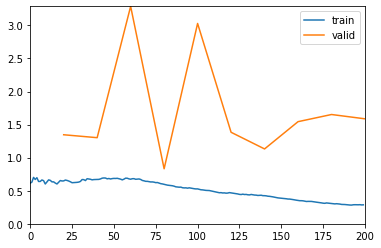

Better model found at epoch 1 with valid_loss value: 1.3018444776535034.
Better model found at epoch 3 with valid_loss value: 0.8319382667541504.


In [ ]:
learn.fit_one_cycle(10)

In [ ]:
learn.save('stage-2')

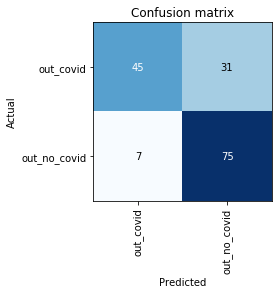

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix()

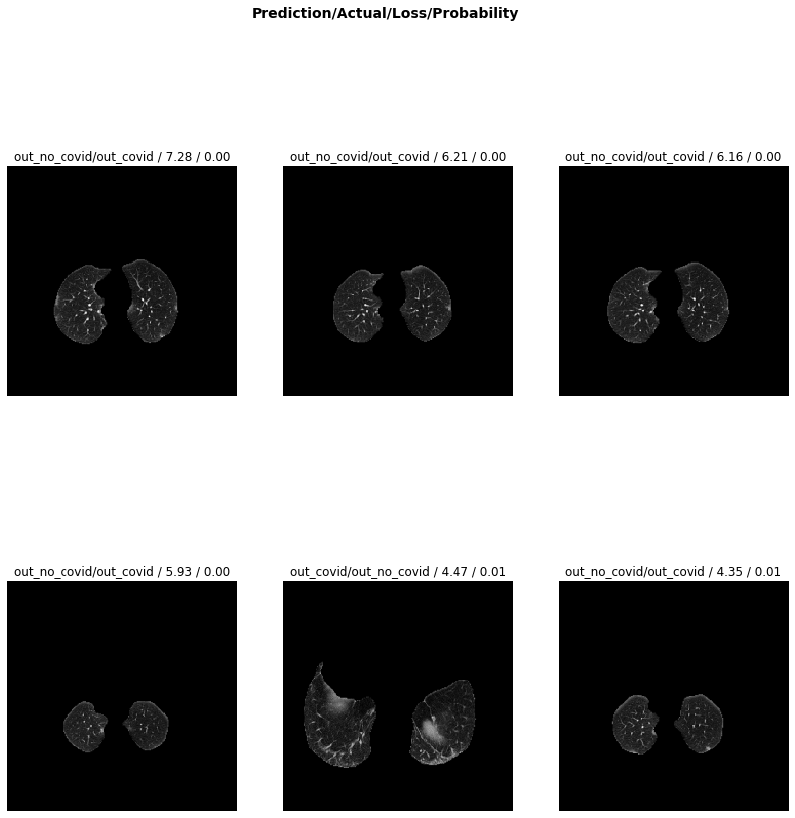

In [ ]:
interp.plot_top_losses(6, figsize=(14,14), heatmap = False)

In [ ]:
from fastai.vision import *
from fastai.widgets import ClassConfusion

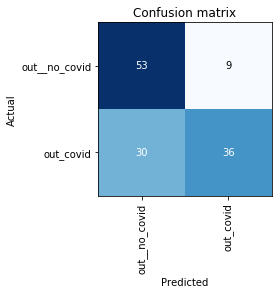

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix()

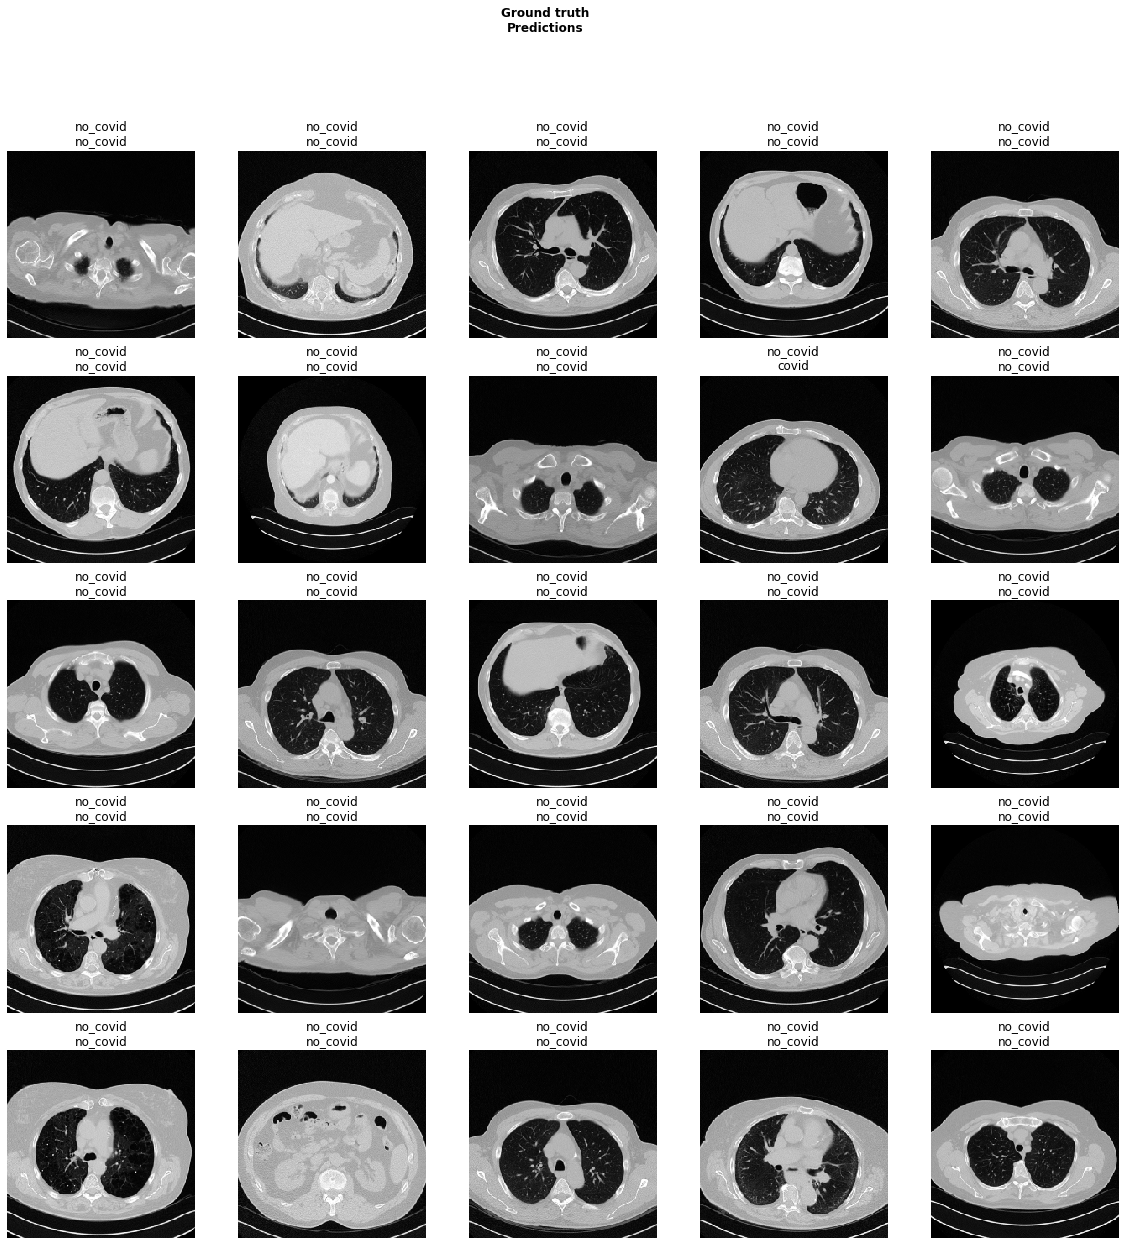

In [ ]:
learn.show_results(ds_type=DatasetType.Valid)

In [ ]:
!ls ../data/

models	test  train  valid


In [ ]:

file = '../data/test/covid/1.3.12.2.1107.5.1.4.67089.30000020032608490724900083379.dcm.png'
img = open_image(file)
pred = learn.predict(img)
pred

(Category tensor(0), tensor(0), tensor([0.9677, 0.0323]))